# Faster R-CNN
## Truck & Bus
<pre><font size="4">
CTR + Q : Documentation window
</pre></font>


## DATASET

In [1]:
import os
import pandas as pd
from utils import CLASS_NAME_TO_ID, visualize

import cv2
import matplotlib.pyplot as plt
import torch
import numpy as np

In [2]:
CLASS_NAME_TO_ID = {'Bus': 0, 'Truck': 1}
CLASS_ID_TO_NAME = {0: 'Bus', 1: 'Truck'}
BOX_COLOR = {'Bus':(200, 0, 0), 'Truck':(0, 0, 200)}

TEXT_COLOR = (255, 255, 255)

def save_model(model_state, model_name, save_dir="./trained_model"):
    os.makedirs(save_dir, exist_ok=True)
    torch.save(model_state, os.path.join(save_dir, model_name))


def visualize_bbox(image, bbox, class_name, color=BOX_COLOR, thickness=2):
    x_center, y_center, w, h = bbox
    x_min = int(x_center - w/2)
    y_min = int(y_center - h/2)
    x_max = int(x_center + w/2)
    y_max = int(y_center + h/2)

    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color=color[class_name], thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(image, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), color[class_name], -1)
    cv2.putText(
        image,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return image


def visualize(image, bboxes, category_ids):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = CLASS_ID_TO_NAME[category_id]
        img = visualize_bbox(img, bbox, class_name)
    return img

In [3]:
data_dir = "../data/detection/"
data_df = pd.read_csv(os.path.join(data_dir, 'df.csv'))

In [4]:
data_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,...,IsDepiction,IsInside,XClick1X,XClick2X,XClick3X,XClick4X,XClick1Y,XClick2Y,XClick3Y,XClick4Y
0,0000599864fd15b3,xclick,Bus,1,0.343750,0.908750,0.156162,0.650047,1,0,...,0,0,0.421875,0.343750,0.795000,0.908750,0.156162,0.512700,0.650047,0.457197
1,00006bdb1eb5cd74,xclick,Truck,1,0.276667,0.697500,0.141604,0.437343,1,0,...,0,0,0.299167,0.276667,0.697500,0.659167,0.141604,0.241855,0.352130,0.437343
2,00006bdb1eb5cd74,xclick,Truck,1,0.702500,0.999167,0.204261,0.409774,1,1,...,0,0,0.849167,0.702500,0.906667,0.999167,0.204261,0.398496,0.409774,0.295739
3,00010bf498b64bab,xclick,Bus,1,0.156250,0.371250,0.269188,0.705228,0,0,...,0,0,0.274375,0.371250,0.311875,0.156250,0.269188,0.493882,0.705228,0.521691
4,00013f14dd4e168f,xclick,Bus,1,0.287500,0.999375,0.194184,0.999062,0,1,...,0,0,0.920000,0.999375,0.648750,0.287500,0.194184,0.303940,0.999062,0.523452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24057,fff2b15ad6007d0e,activemil,Truck,1,0.277344,0.622656,0.226389,0.859722,0,0,...,0,0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
24058,fff376d20410e4c9,xclick,Bus,1,0.295625,0.558750,0.306667,0.397500,1,0,...,1,0,0.424375,0.316250,0.295625,0.558750,0.306667,0.397500,0.382500,0.335833
24059,fff376d20410e4c9,xclick,Bus,1,0.348125,0.701250,0.423333,0.744167,0,0,...,1,0,0.478750,0.493125,0.348125,0.701250,0.423333,0.744167,0.537500,0.523333
24060,fffde5953a818927,xclick,Bus,1,0.277500,0.605625,0.565000,0.795833,0,0,...,0,0,0.488125,0.277500,0.517500,0.605625,0.565000,0.670000,0.795833,0.704167


In [5]:
index = 0
image_files = [fn for fn in os.listdir("../data/detection/images/") if fn.endswith("jpg")]
image_file = image_files[index]
image_path = os.path.join("../data/detection/images/", image_file)

In [6]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [7]:
print(image.shape)

(170, 256, 3)


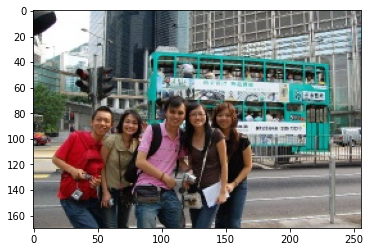

In [8]:
plt.imshow(image)

In [9]:
image_id = image_file.split('.')[0]
image_id

'0000599864fd15b3'

In [10]:
meta_data = data_df[data_df['ImageID'] == image_id]
cate_names = meta_data["LabelName"].values
bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values

bboxes

array([[0.34375 , 0.90875 , 0.156162, 0.650047]])

In [11]:
print(type(cate_names))
cate_names

<class 'numpy.ndarray'>


array(['Bus'], dtype=object)

In [12]:
img_H, img_W, _ = image.shape
class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
class_ids # 0 : BUS, 1 : TRUCK

[0]

## DATA PREPROCESSING
#### ["XMin", "XMax", "YMin", "YMax"] -> ["X_Center", "Y_Center", "Width", "Height"]

In [13]:
unnorm_bboxes = bboxes.copy()
print(unnorm_bboxes)
print(unnorm_bboxes[:, 2:3])
print(unnorm_bboxes[:, 2:4])
print(unnorm_bboxes[:, [0,2]])
print(unnorm_bboxes[:, [1,3]])

[[0.34375  0.90875  0.156162 0.650047]]
[[0.156162]]
[[0.156162 0.650047]]
[[0.34375  0.156162]]
[[0.90875  0.650047]]


In [14]:
unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]] # ["XMin", "XMax", "YMin", "YMax"] -> ["XMin", "YMin", "XMax", "YMax"]
unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2] # ["XMin", "YMin", "XMax", "YMax"] -> ["XMin", "YMin", "XMax-XMin = Width", "YMax-YMin = Height"]
unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2) # ["XMin", "YMin", "Width", "Height"] ->  ["XMin + w/2 = X_Center", "YMin + h/2 = Y_Center", "Width", "Height"]

#X_Center = XMin + w/2
#Y_Center = YMin + h/2
unnorm_bboxes[:, [0,2]] *= img_W #  X_Center, Width
unnorm_bboxes[:, [1,3]] *= img_H

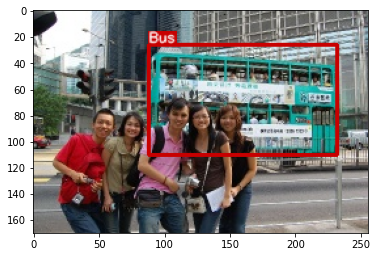

In [15]:
canvas = visualize(image, unnorm_bboxes, class_ids)
plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [16]:
def show_sample(index=0):
    image_file = image_files[index]
    image_path = os.path.join("../data/detection/images/", image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    image_id = image_file.split('.')[0]
    meta_data = data_df[data_df['ImageID'] == image_id]
    cate_names = meta_data["LabelName"].values
    bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
    
    img_H, img_W, _ = image.shape

    class_ids = [CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names]
    unnorm_bboxes = bboxes.copy()
    unnorm_bboxes[:, [1,2]] = unnorm_bboxes[:, [2,1]]
    unnorm_bboxes[:, 2:4] -= unnorm_bboxes[:, 0:2]
    unnorm_bboxes[:, 0:2] += (unnorm_bboxes[:, 2:4] / 2)
    unnorm_bboxes[:, [0,2]] *= img_W
    unnorm_bboxes[:, [1,3]] *= img_H
    canvas = visualize(image, unnorm_bboxes, class_ids)
    
    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.axis('off')
    plt.show()

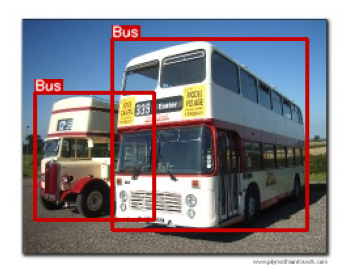

In [17]:
show_sample(500)

## DATASET TO TENSOR
#### - DEFAULT OPEN CV FORMAT : ["XMin", "YMin", "XMax", "YMax"]
#### - DEFAULT YOLO FORMAT : ["X_Center", "Y_Center", "Width", "Height"]
#### - COCO BOUDNING FORMAT : ["XMin", "YMin", "Width", "Height"]

In [18]:
class Detection_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.data_dir = data_dir
        self.phase = phase
        self.data_df = pd.read_csv(os.path.join(self.data_dir, 'df.csv'))
        self.image_files = [fn for fn in os.listdir(os.path.join(self.data_dir, phase)) if fn.endswith("jpg")]
        self.transformer = transformer
        
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        """
        input : get_label
        target : get_label -> return(bboxes, class_ids)
        """

        # IMAGE
        filename, image = self.get_image(index)
        # TARGET
        bboxes, class_ids = self.get_label(filename)

        img_H, img_W, _ = image.shape
        if self.transformer:
            # image shape : (H, W, C)
            # tensor shape : (C, H, W)
            image = self.transformer(image)
            _, img_H, img_W = image.shape
        
        bboxes[:, [0,2]] *= img_W # XMin, XMax * img_W
        bboxes[:, [1,3]] *= img_H # YMin, YMax * img_H

        target = {}
        target["boxes"] = torch.Tensor(bboxes).float() # ["XMin", "YMin", "XMax", "YMax"]
        target["labels"] = torch.Tensor(class_ids).long()
            
        return image, target, filename
            
    def get_image(self, index):
        filename = self.image_files[index]
        image_path = os.path.join(self.data_dir, self.phase, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return filename, image
    
    def get_label(self, filename):
        image_id = filename.split('.')[0]
        meta_data = self.data_df[self.data_df['ImageID'] == image_id]
        cate_names = meta_data["LabelName"].values
        class_ids = np.array([CLASS_NAME_TO_ID[cate_name] for cate_name in cate_names])
        bboxes = meta_data[["XMin", "XMax", "YMin", "YMax"]].values
        bboxes[:, [1,2]] = bboxes[:, [2,1]] # ["XMin", "XMax", "YMin", "YMax"] -> ["XMin", "YMin", "XMax", "YMax"]
        return bboxes, class_ids

In [19]:
data_dir = "../data/detection/"
dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=None)

In [20]:
dataset[0]

(array([[[ 80,  87,  80],
         [ 86,  93,  86],
         [ 93,  95,  94],
         ...,
         [ 93,  91,  94],
         [ 77,  78,  82],
         [121, 125, 128]],
 
        [[ 79,  83,  82],
         [ 76,  80,  79],
         [ 79,  83,  84],
         ...,
         [ 82,  80,  83],
         [ 92,  93,  95],
         [121, 125, 126]],
 
        [[ 74,  74,  82],
         [ 68,  71,  78],
         [ 71,  74,  79],
         ...,
         [ 85,  83,  84],
         [ 98, 100,  99],
         [116, 122, 120]],
 
        ...,
 
        [[106, 102,  99],
         [108, 104, 101],
         [108, 104, 101],
         ...,
         [165, 157, 144],
         [150, 142, 129],
         [133, 125, 112]],
 
        [[108, 103,  99],
         [103,  98,  94],
         [111, 108, 103],
         ...,
         [166, 160, 148],
         [160, 154, 142],
         [151, 145, 133]],
 
        [[117, 112, 108],
         [116, 111, 107],
         [122, 119, 114],
         ...,
         [173, 167, 155],
  

In [21]:
index = 0
image, target, filename = dataset[index]

In [22]:
image.shape

(170, 256, 3)

In [23]:
target

{'boxes': tensor([[ 88.0000,  26.5475, 232.6400, 110.5080]]),
 'labels': tensor([0])}

In [24]:
dataset.data_df.iloc[0]

ImageID        0000599864fd15b3
Source                   xclick
LabelName                   Bus
Confidence                    1
XMin                    0.34375
XMax                    0.90875
YMin                   0.156162
YMax                   0.650047
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
XClick1X               0.421875
XClick2X                0.34375
XClick3X                  0.795
XClick4X                0.90875
XClick1Y               0.156162
XClick2Y                 0.5127
XClick3Y               0.650047
XClick4Y               0.457197
Name: 0, dtype: object

In [25]:
print(0.34375*256) # XMin * Width
print(0.90875*256) # XMax * Width
print(0.156162*170) # YMin * Height
print(0.650047*170) # YMax * Height

88.0
232.64
26.547539999999998
110.50799


#### VISUALIZE는 기본적으로 COCO FORMAT
#### X_CENTER, Y_CENTER, W, H

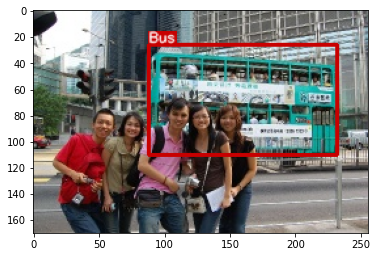

In [26]:
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32) # ARRAY
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

canvas = visualize(image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

In [27]:
def show_sample(index=0):
    image, target, filename = dataset[index]
    boxes = target['boxes'].numpy()
    class_ids = target['labels'].numpy()

    n_obj = boxes.shape[0]
    bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
    bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
    bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

    canvas = visualize(image, bboxes, class_ids)

    plt.figure(figsize=(6,6))
    plt.imshow(canvas)
    plt.show()

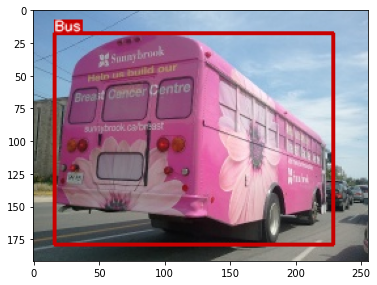

In [28]:
show_sample(68)

#### APPLY TORCHVISION

In [29]:
from torchvision import transforms

In [30]:
IMAGE_SIZE = 448

transformer = transforms.Compose([
        transforms.ToTensor(),
        # YOLO V1 DEFAULT SIZE
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [31]:
data_dir = "../data/detection/"
transformed_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)

#### TRANSFORMER CHECK
#### make_grid :
#### * Normalize data -> Un-normalized
#### * Multi images : [LINK][LINK]

[LINK]:https://bo-10000.tistory.com/155

In [32]:
from torchvision.utils import make_grid

In [33]:
index = 5
image, target, filename = transformed_dataset[index]

#### TENSOR FORMAT
#### NORMALIZED DATASET : Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

In [34]:
image.shape # C,H,W

torch.Size([3, 448, 448])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(448, 448, 3)


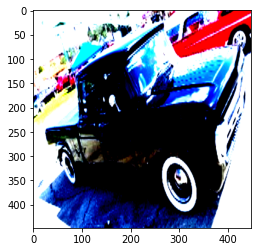

In [35]:
print(image.permute(1,2,0).numpy().shape)
plt.imshow(image.permute(1,2,0).numpy())

#### MAKE GRID : UN_NORMALIZE THE DATASET

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


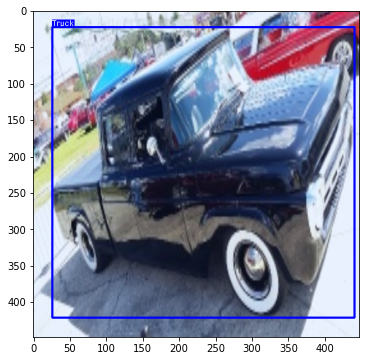

In [36]:
np_image = make_grid(image, normalize=True).cpu().permute(1,2,0).numpy()
boxes = target['boxes'].numpy()
class_ids = target['labels'].numpy()

n_obj = boxes.shape[0]
bboxes = np.zeros(shape=(n_obj, 4), dtype=np.float32)
bboxes[:, 0:2] = (boxes[:, 0:2] + boxes[:, 2:4]) / 2
bboxes[:, 2:4] = boxes[:, 2:4] - boxes[:, 0:2]

canvas = visualize(np_image, bboxes, class_ids)

plt.figure(figsize=(6,6))
plt.imshow(canvas)
plt.show()

#### DATALOADER
#### * collate_fn : MAKE MINIBATCH IN (IMAGE & TARGET)

In [37]:
from torch.utils.data import DataLoader

In [38]:
def collate_fn(batch):
    image_list = []
    target_list = []
    filename_list = []
    
    for a,b,c in batch:
        image_list.append(a)
        target_list.append(b)
        filename_list.append(c)

    return image_list, target_list, filename_list

In [39]:
data_dir = "../data/detection/"
BATCH_SIZE = 6

trainset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn)

In [40]:
for index, batch in enumerate(trainloader):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
    
    if index == 0:
        break

In [41]:
print(len(images))
print(images[0].shape)
print(images[1].shape)

6
torch.Size([3, 448, 448])
torch.Size([3, 448, 448])


In [42]:
targets

[{'boxes': tensor([[206.3600, 354.2815, 336.8400, 425.3057]]),
  'labels': tensor([1])},
 {'boxes': tensor([[ 50.9600,  29.5062, 363.1600, 386.0371]]),
  'labels': tensor([1])},
 {'boxes': tensor([[303.2400, 158.8595, 425.3200, 284.9383],
          [  0.0000,   0.0000, 126.8400, 317.7185],
          [165.2000, 213.4935, 197.9600, 272.7505],
          [199.6400, 196.2625, 270.7600, 277.7936]]),
  'labels': tensor([1, 1, 1, 1])},
 {'boxes': tensor([[ 37.2400,  88.4800, 128.8000, 134.4000],
          [149.5200,  88.8532, 207.4800, 135.8932]]),
  'labels': tensor([1, 1])},
 {'boxes': tensor([[ 92.1200,  33.6000, 404.0400, 423.8770],
          [329.8400,   0.0000, 447.7200, 130.0925]]),
  'labels': tensor([1, 1])},
 {'boxes': tensor([[ 20.4400,  86.9944, 424.4800, 374.4541],
          [ 60.2000, 168.1053,  80.0800, 189.5385]]),
  'labels': tensor([1, 1])}]

In [43]:
filenames

['9d2cbe35a650b6b6.jpg',
 '018a011cc5a4474b.jpg',
 'a20dd8542f8fc717.jpg',
 'ace466b2f1448707.jpg',
 '178ab96fcca8b3f0.jpg',
 '2e29dd7285110315.jpg']

#### MINI-BATCH DATALAODER
#### * [PYTORCH][PYTORCH]
#### * [MNIST][MNIST]

[PYTORCH]:https://wikidocs.net/55580
[MNIST]:https://ws-choi.github.io/blog-kor/seminar/tutorial/mnist/pytorch/mlp/Mini-batch-seminar/

In [44]:
def build_dataloader(data_dir, batch_size=4, image_size=448):
    transformer = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize(size=(image_size, image_size)),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    dataloaders = {}
    train_dataset = Detection_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_dataset = Detection_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
    return dataloaders

In [45]:
data_dir = "../data/detection/"
dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)

for phase in ["train", "val"]:
    for index, batch in enumerate(dloaders[phase]):
        images = batch[0]
        targets = batch[1]
        filenames = batch[2]

        print(f"{phase} - {targets}")
        print(f"{phase} - {filenames}")
        if index == 0:
            break

train - [{'boxes': tensor([[ 53.3496,  44.2400, 424.0611, 429.8000]]), 'labels': tensor([1])}, {'boxes': tensor([[ 57.4000,  69.8132, 379.6800, 427.8400]]), 'labels': tensor([0])}, {'boxes': tensor([[ 94.9200,  60.6941, 423.9200, 439.6547],
        [ 46.4800, 193.0840, 103.8800, 267.4345],
        [436.2400, 199.9119, 447.7200, 234.8111]]), 'labels': tensor([1, 1, 1])}, {'boxes': tensor([[145.6000, 114.0998, 438.2000, 424.9002],
        [  0.0000,  30.1002, 155.4000, 185.4998]]), 'labels': tensor([1, 1])}]
train - ['29ecd6a6d96df44a.jpg', '6a09aa6cde0a6326.jpg', '82c21b98e0239006.jpg', '20924256e81da651.jpg']
val - [{'boxes': tensor([[ 80.9200, 186.5965, 303.5200, 393.7862]]), 'labels': tensor([1])}]
val - ['e4527471d9fb72a6.jpg']


## Faster R-CNN ARCHITECTURE
#### Object Detection : Backbone, Neck and Head Architecture -> [VELOG][VELOG]

[VELOG]:https://velog.io/@hewas1230/ObjectDetection-Architecture

In [46]:
from torchvision import models
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

In [47]:
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model

C:\Users\pjm98\PycharmProjects\pytorch_image\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\pjm98\PycharmProjects\pytorch_image\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

#### PYTORCH VISION MODELS REFERENCE -> [PYTORCH][LINK]
#### FAST-RCNN -> [PYTORCH-MODEL][LINK2]
[LINK]:https://pytorch.org/vision/stable/models.html
[LINK2]:https://pytorch.org/vision/stable/models/faster_rcnn.html

In [48]:
def build_model(num_classes):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    return model

In [49]:
NUM_CLASSES = 2
model = build_model(num_classes=NUM_CLASSES)

In [50]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## DETECTOR TRAINING

#### model.train()에 한해서만 'loss = model(images, targets)'

In [51]:
phase = 'train'

model.train()

# dloaders = build_dataloader(data_dir, batch_size=4, image_size=448)
for index, batch in enumerate(dloaders[phase]):
    images = batch[0]
    targets = batch[1]
    filenames = batch[2]
        
    images = list(image for image in images)
    targets = [{k: v for k, v in t.items()} for t in targets]
    
    loss = model(images, targets)
    if index == 0:
        break

#### COLLECT ALL LOSSES


In [52]:
loss

{'loss_classifier': tensor(0.2616, grad_fn=<NllLossBackward0>),
 'loss_box_reg': tensor(0.0737, grad_fn=<DivBackward0>),
 'loss_objectness': tensor(0.1364, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
 'loss_rpn_box_reg': tensor(0.0129, grad_fn=<DivBackward0>)}

In [53]:
images

[tensor([[[-1.2617, -1.0354, -0.6733,  ...,  2.1498,  2.1792,  2.1975],
          [-1.2820, -1.0541, -0.6894,  ...,  2.1517,  2.1778,  2.1942],
          [-1.3982, -1.1611, -0.7817,  ...,  2.1623,  2.1700,  2.1748],
          ...,
          [-0.2734, -0.2666, -0.2557,  ..., -0.8677, -0.7070, -0.6066],
          [-0.0796, -0.0682, -0.0499,  ..., -0.6116, -0.5211, -0.4645],
          [-0.0458, -0.0336, -0.0140,  ..., -0.5669, -0.4886, -0.4397]],
 
         [[-0.9853, -0.7477, -0.3675,  ...,  2.3098,  2.3398,  2.3585],
          [-1.0060, -0.7668, -0.3840,  ...,  2.3117,  2.3384,  2.3551],
          [-1.1249, -0.8762, -0.4784,  ...,  2.3225,  2.3304,  2.3353],
          ...,
          [-0.0606, -0.0536, -0.0424,  ..., -0.6778, -0.5136, -0.4109],
          [ 0.1508,  0.1625,  0.1812,  ..., -0.4094, -0.3169, -0.2590],
          [ 0.1877,  0.2002,  0.2202,  ..., -0.3625, -0.2825, -0.2325]],
 
         [[-0.7238, -0.4873, -0.1088,  ...,  2.6238,  2.6338,  2.6400],
          [-0.7445, -0.5063,

In [54]:
print(targets)
print([{k: v.to('cuda') for k, v in t.items()} for t in targets])

[{'boxes': tensor([[ 20.5332, 177.8408, 271.0400, 367.0088],
        [ 21.2800, 174.4427, 267.3068, 359.6459]]), 'labels': tensor([0, 0])}, {'boxes': tensor([[186.7600, 215.5633, 398.7200, 381.7704]]), 'labels': tensor([1])}, {'boxes': tensor([[210.5600, 174.6438, 427.2800, 381.3484]]), 'labels': tensor([1])}, {'boxes': tensor([[ 62.7200,   0.0000, 447.7200, 394.3072]]), 'labels': tensor([1])}]
[{'boxes': tensor([[ 20.5332, 177.8408, 271.0400, 367.0088],
        [ 21.2800, 174.4427, 267.3068, 359.6459]], device='cuda:0'), 'labels': tensor([0, 0], device='cuda:0')}, {'boxes': tensor([[186.7600, 215.5633, 398.7200, 381.7704]], device='cuda:0'), 'labels': tensor([1], device='cuda:0')}, {'boxes': tensor([[210.5600, 174.6438, 427.2800, 381.3484]], device='cuda:0'), 'labels': tensor([1], device='cuda:0')}, {'boxes': tensor([[ 62.7200,   0.0000, 447.7200, 394.3072]], device='cuda:0'), 'labels': tensor([1], device='cuda:0')}]


#### set_grad_enabled() : [STACKOVERFLOW][STACKOVERFLOW]
#### model.train() vs model.eval() : [YOUTUBE][YOUTUBE], [PYTHON GUIDE][PYTHON]
[STACKOVERFLOW]:https://stackoverflow.com/questions/53447345/pytorch-set-grad-enabledfalse-vs-with-no-grad
[YOUTUBE]: https://www.youtube.com/watch?v=GzjRE3MUx6Q&ab_channel=MLDawn
[PYTHON]:https://pythonguides.com/pytorch-model-eval/#:~:text=PyTorch%20model%20eval%20train%20is,during%20training%20and%20evaluating%20time.

In [55]:
from collections import defaultdict

def train_one_epoch(dataloaders, model, optimizer, device):

    train_loss = defaultdict(float)
    val_loss = defaultdict(float)
    
    model.train()
    # DATALOADER -> PHASE["train", "val"]
    for phase in ["train", "val"]:
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0]
            targets = batch[1]
            filenames = batch[2]

            # IMAGE TO DEVICE
            images = list(image.to(device) for image in images)
            # for t in targets : bring each target outputs
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # 'no_grad()' IS SAME AS 'set_grad_enabled()'
            """
             with torch.no_grad():
                prediction = model(images)
            """
            with torch.set_grad_enabled(phase == "train"):
                loss = model(images, targets)

            # GET TOTAL LOSSES
            total_loss = sum(each_loss for each_loss in loss.values())

            # IF "TRAIN" OR "VAL"
            if phase == "train":
                optimizer.zero_grad()
                total_loss.backward()
                optimizer.step()

                if (index > 0) and (index % VERBOSE_FREQ) == 0:
                    text = f"{index}/{len(dataloaders[phase])} - "
                    for k, v in loss.items():
                        text += f"{k}: {v.item():.4f}  "
                    print(text)

                for k, v in loss.items():
                    train_loss[k] += v.item()
                train_loss["total_loss"] += total_loss.item()
                
            else:
            # IF phase == "val":
                for k, v in loss.items():
                    val_loss[k] += v.item()
                val_loss["total_loss"] += total_loss.item()
                
    for k in train_loss.keys():
        train_loss[k] /= len(dataloaders["train"])
        val_loss[k] /= len(dataloaders["val"])
    return train_loss, val_loss

In [55]:
data_dir = "../data/detection/"
is_cuda = True

NUM_CLASSES = 2
IMAGE_SIZE = 448
BATCH_SIZE = 6
VERBOSE_FREQ = 200 # 200 ITERATION -> PRINT LOSS
DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')

dataloaders = build_dataloader(data_dir=data_dir, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
model = build_model(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
num_epochs = 30

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    train_loss, val_loss = train_one_epoch(dataloaders, model, optimizer, DEVICE)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    
    print(f"epoch:{epoch+1}/{num_epochs} - Train Loss: {train_loss['total_loss']:.4f}, Val Loss: {val_loss['total_loss']:.4f}")
    
    if (epoch+1) % 10 == 0:
        save_model(model.state_dict(), f'model_{epoch+1}.pth')

200/2284 - loss_classifier: 0.1262  loss_box_reg: 0.1544  loss_objectness: 0.0585  loss_rpn_box_reg: 0.0073  
400/2284 - loss_classifier: 0.0538  loss_box_reg: 0.0385  loss_objectness: 0.0036  loss_rpn_box_reg: 0.0045  
600/2284 - loss_classifier: 0.0214  loss_box_reg: 0.0225  loss_objectness: 0.0163  loss_rpn_box_reg: 0.0030  
800/2284 - loss_classifier: 0.0323  loss_box_reg: 0.0326  loss_objectness: 0.0035  loss_rpn_box_reg: 0.0034  
1000/2284 - loss_classifier: 0.0525  loss_box_reg: 0.0574  loss_objectness: 0.0199  loss_rpn_box_reg: 0.0044  
1200/2284 - loss_classifier: 0.0143  loss_box_reg: 0.0093  loss_objectness: 0.0097  loss_rpn_box_reg: 0.0171  
1400/2284 - loss_classifier: 0.0197  loss_box_reg: 0.0239  loss_objectness: 0.0135  loss_rpn_box_reg: 0.0063  
1600/2284 - loss_classifier: 0.0213  loss_box_reg: 0.0256  loss_objectness: 0.0076  loss_rpn_box_reg: 0.0032  
1800/2284 - loss_classifier: 0.0286  loss_box_reg: 0.0328  loss_objectness: 0.0065  loss_rpn_box_reg: 0.0073  
2000/

KeyboardInterrupt: 

In [47]:
tr_loss_classifier = [] 
tr_loss_box_reg = []
tr_loss_objectness = []
tr_loss_rpn_box_reg = []
tr_loss_total = []

for tr_loss in train_losses:
    tr_loss_classifier.append(tr_loss['loss_classifier'])
    tr_loss_box_reg.append(tr_loss['loss_box_reg'])
    tr_loss_objectness.append(tr_loss['loss_objectness'])
    tr_loss_rpn_box_reg.append(tr_loss['loss_rpn_box_reg'])
    tr_loss_total.append(tr_loss['total_loss'])

val_loss_classifier = [] 
val_loss_box_reg = []
val_loss_objectness = []
val_loss_rpn_box_reg = []
val_loss_total = []

for vl_loss in val_losses:
    val_loss_classifier.append(vl_loss['loss_classifier'])
    val_loss_box_reg.append(vl_loss['loss_box_reg'])
    val_loss_objectness.append(vl_loss['loss_objectness'])
    val_loss_rpn_box_reg.append(vl_loss['loss_rpn_box_reg'])
    val_loss_total.append(vl_loss['total_loss'])

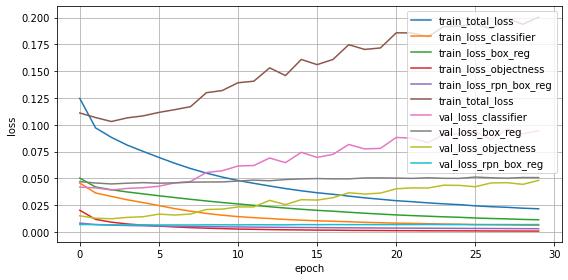

In [48]:
plt.figure(figsize=(8, 4))
plt.plot(tr_loss_total, label="train_total_loss")
plt.plot(tr_loss_classifier, label="train_loss_classifier")
plt.plot(tr_loss_box_reg,  label="train_loss_box_reg")
plt.plot(tr_loss_objectness, label="train_loss_objectness")
plt.plot(tr_loss_rpn_box_reg,  label="train_loss_rpn_box_reg")

plt.plot(val_loss_total, label="train_total_loss")
plt.plot(val_loss_classifier, label="val_loss_classifier")
plt.plot(val_loss_box_reg,  label="val_loss_box_reg")
plt.plot(val_loss_objectness, label="val_loss_objectness")
plt.plot(val_loss_rpn_box_reg,  label="val_loss_rpn_box_reg")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend(loc='upper right')
plt.tight_layout()

### Confidence Threshold & Non-Maximum Suppression(NMS)

#### YOLO에도 NMS는 사용된다 : [Youtube 참조][고려대학교 산업경영공학부 DSBA 연구실]


[고려대학교 산업경영공학부 DSBA 연구실]:[https://www.youtube.com/watch?v=O78V3kwBRBk&ab_channel=%EA%B3%A0%EB%A0%A4%EB%8C%80%ED%95%99%EA%B5%90%EC%82%B0%EC%97%85%EA%B2%BD%EC%98%81%EA%B3%B5%ED%95%99%EB%B6%80DSBA%EC%97%B0%EA%B5%AC%EC%8B%A4]

In [56]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = build_model(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    """
    MODEL EVAL ->
    --------------------------
    with torch.no_grad():
        prediction = model(images)
    --------------------------
    """
    model.eval()
    return model

In [57]:
is_cuda = True

NUM_CLASSES = 2
DEVICE = torch.device('cuda' if is_cuda and torch.cuda.is_available() else 'cpu')

data_dir = "../data/detection/"
dataloaders = build_dataloader(data_dir, batch_size=1)
num_classes = len(CLASS_NAME_TO_ID)

model = load_model(ckpt_path='./trained_model/model_30.pth', num_classes=NUM_CLASSES, device=DEVICE)

C:\Users\pjm98\PycharmProjects\pytorch_image\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\pjm98\PycharmProjects\pytorch_image\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [58]:
model

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## Non-Maximum Supression Sample

In [59]:
from torchvision.ops import nms
from torchvision.utils import make_grid

In [60]:
print(DEVICE)

cuda


In [61]:
for index, batch in enumerate(dataloaders['val']):
    images = batch[0]
    images = [image.to(DEVICE) for image in images]

    with torch.no_grad():
        prediction = model(images)

    if index == 0:
        break

In [62]:
"""
Faster-R-CNN output : x1(min), y1(mean), x2(max), y2(max)
It runs through 'Detection_dataset'
"""
prediction

[{'boxes': tensor([[ 82.6931, 190.1368, 294.1698, 390.6787]], device='cuda:0'),
  'labels': tensor([1], device='cuda:0'),
  'scores': tensor([1.0000], device='cuda:0')}]

### Confidence Threshold & Non-Maximum Suppression Function
#### * np.newaxis : 차원늘리기 ([참조][참조])

[참조]:https://azanewta.tistory.com/3

In [63]:
def postprocess(prediction, conf_thres=0.2, IoU_threshold=0.1):
    # Convert into numpy format
    pred_box = prediction["boxes"].cpu().detach().numpy()
    pred_label = prediction["labels"].cpu().detach().numpy()
    pred_conf = prediction['scores'].cpu().detach().numpy()

    # Confidence Threshold
    valid_index = pred_conf > conf_thres
    pred_box = pred_box[valid_index]
    pred_label = pred_label[valid_index]
    pred_conf = pred_conf[valid_index]

    # Non-Maximum Suppression
    """
    nms : They are expected to be in (x1(min), y1(min), x2(max), y2(max))
    """
    valid_index = nms(torch.tensor(
        pred_box.astype(np.float32)), # Convert into tensor foramt
        torch.tensor(pred_conf),
        IoU_threshold
    )

    pred_box = pred_box[valid_index.numpy()]
    pred_conf = pred_conf[valid_index.numpy()]
    pred_label = pred_label[valid_index.numpy()]

    """
    [N.predictions] -> [n, [x1, y1, x2, y2, confidence score, class_id]] per image
    """
    return np.concatenate((pred_box, pred_conf[:, np.newaxis], pred_label[:, np.newaxis]), axis=1)

In [64]:
pred_images = []
pred_labels =[]

for index, (images, _, filenames) in enumerate(dataloaders["val"]):
    """
    * MINI-BATCH SIZE = 1 -> dataloaders["val"]
    """
    # image output = list(image)
    images = list(image.to(DEVICE) for image in images)
    filename = filenames[0]

    # (C, H, W) -> (H, W, C)
    image = make_grid(images[0].cpu().detach(), normalize=True).permute(1,2,0).numpy()
    image = (image * 255).astype(np.uint8)

    # model.predict
    with torch.no_grad():
        prediction = model(images)

    # prediction output = list(prediction)
    # x1(min), y1(mean), x2(max), y2(max)
    prediction = postprocess(prediction[0])

    # adjust Box Size into the picture (Min ~ Max)
    prediction[:, 2].clip(min=0, max=image.shape[1]) #image.shape[1] = Width
    prediction[:, 3].clip(min=0, max=image.shape[0]) #image.shape[0] = Height

    # prediction modification
    xc = (prediction[:, 0] + prediction[:, 2])/2 # (X_min + X_max)/2 = X_Center
    yc = (prediction[:, 1] + prediction[:, 3])/2 # (Y_min + Y_max)/2 = Y_Center
    w = prediction[:, 2] - prediction[:, 0] # X_max - X_min = Width
    h = prediction[:, 3] - prediction[:, 1] # Y_max - Y_min = Height

    # class_id
    cls_id = prediction[:, 5]
    # stack
    prediction_yolo = np.stack([xc, yc, w, h, cls_id], axis=1)
    # append
    pred_images.append(image)
    pred_labels.append(prediction_yolo)
    
    if index == 100:
        break

In [65]:
print(xc.shape)
print(yc.shape)
print(cls_id)

(1,)
(1,)
[1.]


In [66]:
pred_labels # (xc, yc, w, h, cls_id)

[array([[188.43144989, 290.40774536, 211.47676086, 200.54187012,
           1.        ]]),
 array([[208.2251358 , 197.6634903 ,  88.44810486,  52.08323669,
           1.        ],
        [412.11300659, 194.38002014,  64.59002686,  43.072052  ,
           1.        ],
        [ 39.46232831, 256.95478058,  76.91779637, 246.33140564,
           1.        ]]),
 array([[299.85535431, 290.83810425, 176.79667664, 232.47595215,
           1.        ]]),
 array([[216.42958069, 210.87445831, 166.62741089, 113.70372009,
           1.        ],
        [343.85264587, 216.76664734, 143.9548645 ,  96.08596802,
           1.        ],
        [ 82.80100822, 209.26150513, 153.43753433, 128.25213623,
           1.        ]]),
 array([], shape=(0, 5), dtype=float64),
 array([[218.81824303, 244.67175293, 340.29137039, 182.675354  ,
           1.        ]]),
 array([], shape=(0, 5), dtype=float64),
 array([], shape=(0, 5), dtype=float64),
 array([[225.82265854, 243.57100677, 372.28418732, 322.26948547,
 

In [67]:
def show_result(index=0):
    result = visualize(pred_images[index], pred_labels[index][:, 0:4], pred_labels[index][:, 4])
    
    plt.figure(figsize=(6,6))
    plt.imshow(result)
    plt.show()

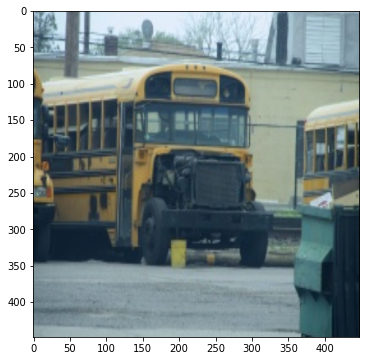

In [68]:
show_result(30)

## Improve accuracy - AP & mAP
#### LINK : [towardsdatascience][LINK]

[LINK]:https://towardsdatascience.com/map-mean-average-precision-might-confuse-you-5956f1bfa9e2

In [69]:
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

#### val.json : Image ground-truth value

In [70]:
annFile = "../data/detection/val.json"

In [71]:
with open(annFile, mode='r') as f:
    json_data = json.load(f)

In [72]:
json_data.keys()

dict_keys(['images', 'imageToid', 'categories', 'annotations'])

In [73]:
json_data["images"][0]

{'file_name': 'e4527471d9fb72a6.jpg', 'height': 448, 'width': 448, 'id': 0}

In [74]:
json_data["imageToid"]

{'e4527471d9fb72a6.jpg': 0,
 'e45378fc7d0fcf38.jpg': 1,
 'e4547c0f11a25f58.jpg': 2,
 'e45593017939235a.jpg': 3,
 'e45857361b6172e6.jpg': 4,
 'e45ee0a14da30b31.jpg': 5,
 'e45f5a56483cc0b8.jpg': 6,
 'e45fb73b36094d2f.jpg': 7,
 'e462cd99acd5e112.jpg': 8,
 'e468a3c6170201e6.jpg': 9,
 'e4780e444c34a536.jpg': 10,
 'e480c7a7d8469225.jpg': 11,
 'e496c05315e8f175.jpg': 12,
 'e49ea12d46b1ae0d.jpg': 13,
 'e4a12d6db93ecb56.jpg': 14,
 'e4a27860f48c4a74.jpg': 15,
 'e4aa4f7c35293499.jpg': 16,
 'e4ac895d8077d436.jpg': 17,
 'e4b0b877f0854b48.jpg': 18,
 'e4b6bade63f0c8d9.jpg': 19,
 'e4bc41a191c72ef9.jpg': 20,
 'e4bf9b6af9e923e8.jpg': 21,
 'e4c5a25482ed8172.jpg': 22,
 'e4ccd930f5b88ab8.jpg': 23,
 'e4ce04b061e77510.jpg': 24,
 'e4d26152fd339288.jpg': 25,
 'e4d3cc75a46c457a.jpg': 26,
 'e4e07295aab04434.jpg': 27,
 'e4e7a5cfaa411de1.jpg': 28,
 'e4f477537056b77a.jpg': 29,
 'e4f6762a8c7a098e.jpg': 30,
 'e4f77387f89a2460.jpg': 31,
 'e500630f4e5108a8.jpg': 32,
 'e504657efdef1b98.jpg': 33,
 'e512e8e7986a9a0f.jpg':

In [75]:
json_data["categories"]

[{'id': 0, 'supercategory': '', 'name': 'Bus'},
 {'id': 1, 'supercategory': '', 'name': 'Truck'}]

In [76]:
json_data["annotations"][0]

{'id': 0,
 'image_id': 0,
 'bbox': [80.92, 186.6, 222.6, 207.19],
 'area': 46120.49,
 'iscrowd': 0,
 'category_id': 1,
 'segmentation': []}

#### from pycocotools.coco import COCO : [JSON FORMAT][LINK]
[LINK]:https://dohyeon.tistory.com/m/15

In [77]:
imageToid = json_data["imageToid"] # Bring image id -> This can bring files
cocoGt = COCO(annFile) # Insert CoCo annotation value into COCO

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!


#### check batch size with 'build_dataloader' function

In [78]:
dataloaders["val"].batch_size

1

#### This follows CoCo foramt to calculate mAP

In [79]:
COCO_anno = []

def XminYminXmaxYmax_to_XminYminWH(box):
    Xmin = box[:, 0]
    Ymin = box[:, 1]
    W = box[:, 2] - box[:, 0]
    H = box[:, 3] - box[:, 1]
    return np.stack((Xmin, Ymin, W, H), axis=1)

for index, (images, _, filenames) in enumerate(dataloaders["val"]):

    images = list(image.to(DEVICE) for image in images)

    # because batch in dataloaders["val"] is 1
    filename = filenames[0]
    
    image = make_grid(images[0].cpu().detach(), normalize=True).permute(1,2,0).numpy()
    image = (image * 255).astype(np.uint8)

    # Off auto-gradient
    with torch.no_grad():
        prediction = model(images)

    # prediction output = list(prediction)
    # x1(min), y1(mean), x2(max), y2(max)
    prediction = postprocess(prediction[0])

    # adjust Box Size into the picture (Min ~ Max)
    prediction[:, 2].clip(min=0, max=image.shape[1]) #image.shape[1] = Width
    prediction[:, 3].clip(min=0, max=image.shape[0]) #image.shape[0] = Height

    # (Xmin, Ymin, Xmax, Ymax) -> (Xmin, Ymin, W, H)
    box_xywh = XminYminXmaxYmax_to_XminYminWH(prediction[:, 0:4])

    score = prediction[:, 4][:, np.newaxis]
    cls_id = prediction[:, 5][:, np.newaxis]

    # Each image can have multiple objects. Hence, * len(cls_id)
    img_id = np.array([imageToid[filename], ] * len(cls_id))[:, np.newaxis]

    # Concat
    COCO_anno.append(np.concatenate((img_id, box_xywh, score, cls_id), axis=1))

    if index % 50 == 0:
        print(f"{index}/{len(dataloaders['val'])} Done.")

    print("All Completed")
# Convert list in ndarray
COCO_anno = np.concatenate(COCO_anno, axis=0)

0/1522 Done.
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
50/1522 Done.
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Completed
All Com

In [80]:
cocoDt = cocoGt.loadRes(COCO_anno)

Loading and preparing results...
Converting ndarray to lists...
(1453, 7)
0/1453
DONE (t=0.00s)
creating index...
index created!


#### Precision & Recall : [Link][Link]
<pre><font size="4">
Faster-R CNN (30 Epoch) mAP@.50 = 0.313
</pre></font>
[Link]:https://www.v7labs.com/blog/mean-average-precision

In [81]:
annType = "bbox"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
eval_stats = cocoEval.stats

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.30s).
Accumulating evaluation results...
DONE (t=0.12s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.011
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.094
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.274
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.024
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [82]:
annType = "bbox"
cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.areaRng = [[0, 1e+8], [0, 20**2], [20**2, 100**2], [100**2, 1e+8]]
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()
eval_stats = cocoEval.stats

Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.97s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.204
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.313
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.235
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.277
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.252
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100

In [83]:
# del images, prediction
torch.cuda.empty_cache()

## Apply the model into Faster RCNN

In [84]:
from time import time

In [85]:
video_path = "../data/truck_bus_video.mp4"

In [86]:
transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

@torch.no_grad()
def model_predict(image, model):
    tensor_image = transformer(image)
    tensor_image = tensor_image.to(DEVICE)
    
    prediction = model([tensor_image])
    return prediction

In [ ]:
vid = cv2.VideoCapture(video_path)

while (vid.isOpened()):
    ret, frame = vid.read()
    
    if ret:
        since = time()
        ori_h, ori_w = frame.shape[:2]
        image = cv2.resize(frame, dsize=(IMAGE_SIZE, IMAGE_SIZE))
        prediction = model_predict(image, model)
        prediction = postprocess(prediction[0])
        prediction[:, [0,2]] *= (ori_w/IMAGE_SIZE)
        prediction[:, [1,3]] *= (ori_h/IMAGE_SIZE)
        prediction[:, 2].clip(min=0, max=ori_w)
        prediction[:, 3].clip(min=0, max=ori_h)
    
        xc = (prediction[:, 0] + prediction[:, 2])/2
        yc = (prediction[:, 1] + prediction[:, 3])/2
        w = prediction[:, 2] - prediction[:, 0]
        h = prediction[:, 3] - prediction[:, 1]
        cls_id = prediction[:, 5]
        prediction_yolo = np.stack([xc,yc, w,h, cls_id], axis=1)
        text= f"{(time() - since)*1000:.0f}ms/image"
        
        canvas = visualize(frame, prediction_yolo[:, 0:4], prediction_yolo[:, 4])
        cv2.putText(canvas, text, (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (255, 255, 255), 2)
        cv2.imshow('camera', canvas)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey()
    
vid.release()
cv2.destroyAllWindows()